In [16]:
import gzip
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix , ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("/media/stroke.csv")

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
data.drop('id', axis=1, inplace=True)
data.shape

(5110, 11)

In [18]:
data.drop_duplicates()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [20]:
data[['hypertension', 'heart_disease', 'stroke']] = data[['hypertension', 'heart_disease', 'stroke']].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   object 
 3   heart_disease      5110 non-null   object 
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   object 
dtypes: float64(3), object(8)
memory usage: 439.3+ KB


In [21]:
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


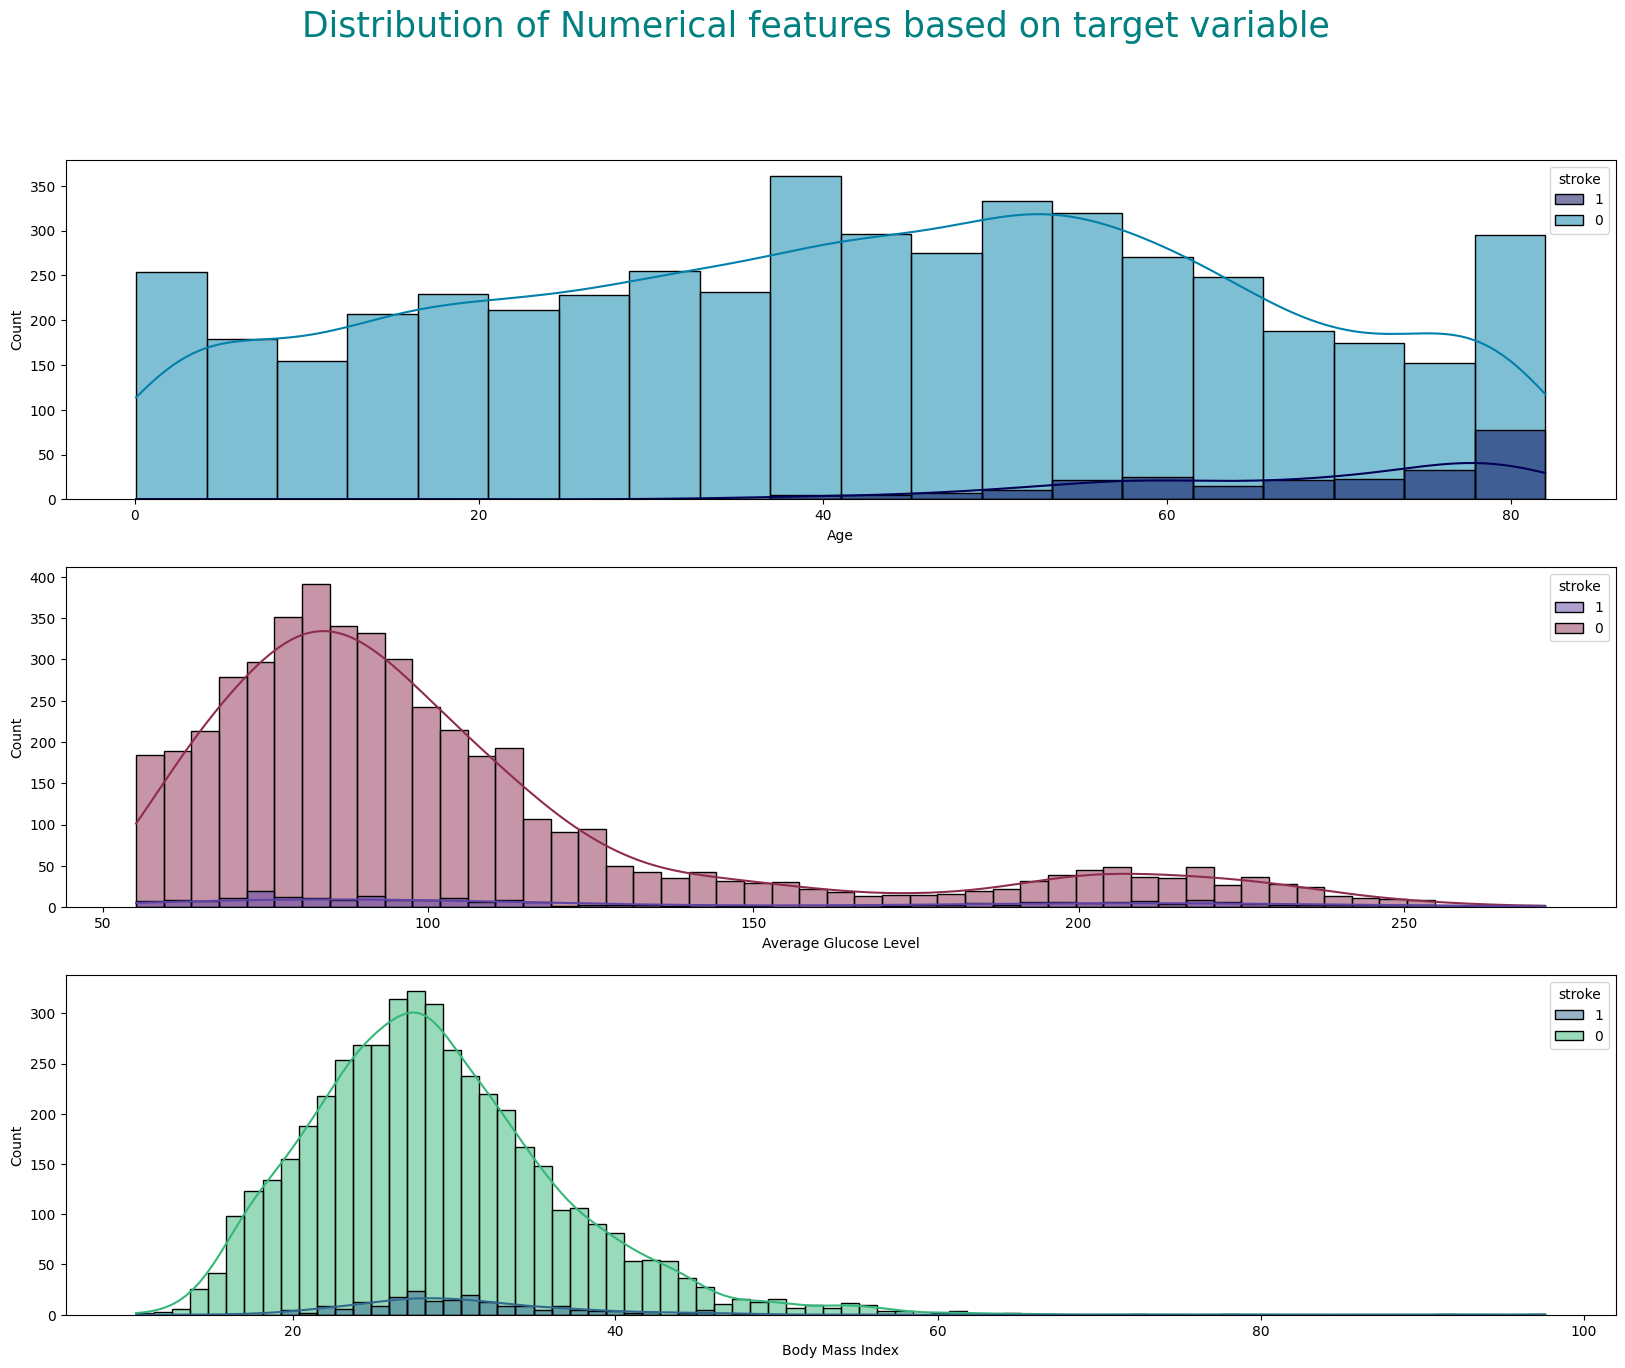

In [8]:
fig, ax = plt.subplots(3, 1, figsize = (20, 15))
plt.suptitle('Distribution of Numerical features based on target variable', fontsize = 25, color = 'teal')
sns.histplot(x = data['age'], hue= data['stroke'], kde= True, ax= ax[0], palette = 'ocean')
ax[0].set(xlabel = 'Age')
sns.histplot(x = data['avg_glucose_level'], hue= data['stroke'], kde= True, ax= ax[1], palette = 'twilight')
ax[1].set(xlabel = 'Average Glucose Level')
sns.histplot(x = data['bmi'], hue= data['stroke'], kde= True, ax= ax[2], palette = 'viridis')
ax[2].set(xlabel = 'Body Mass Index')
plt.show()

In [22]:
for col in ['avg_glucose_level', 'bmi']:
    data[col] = np.log(data[col])

In [23]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,5.432367,3.600048,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,5.309307,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,4.662684,3.481240,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,5.143008,3.538057,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,5.159745,3.178054,never smoked,1


In [24]:
data.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,4.592465,3.328423
std,22.612647,0.361985,0.265064
min,0.080000,4.009513,2.332144
25%,25.000000,4.346982,3.157000
50%,45.000000,4.520538,3.335770
75%,61.000000,4.736988,3.499533
max,82.000000,5.604846,4.580877


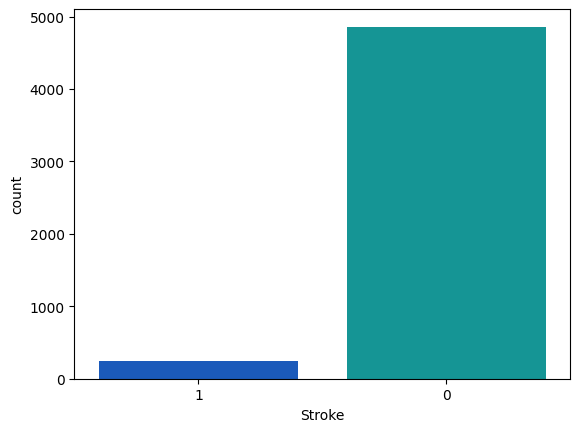

In [25]:
sns.countplot(x = data['stroke'], palette= 'winter')
plt.xlabel('Stroke');

In [26]:
cat_features = data.select_dtypes(exclude="number").columns

cat_cols = cat_features[:-1]
for col in cat_cols:
    print(f'============{col}============\n {data[col].value_counts()}\n')

============gender============
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

============hypertension============
 0    4612
1     498
Name: hypertension, dtype: int64

============heart_disease============
 0    4834
1     276
Name: heart_disease, dtype: int64

============ever_married============
 Yes    3353
No     1757
Name: ever_married, dtype: int64

============work_type============
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

============Residence_type============
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

============smoking_status============
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In [27]:
data.drop(data[data['gender'] == 'Other'].index, inplace= True)

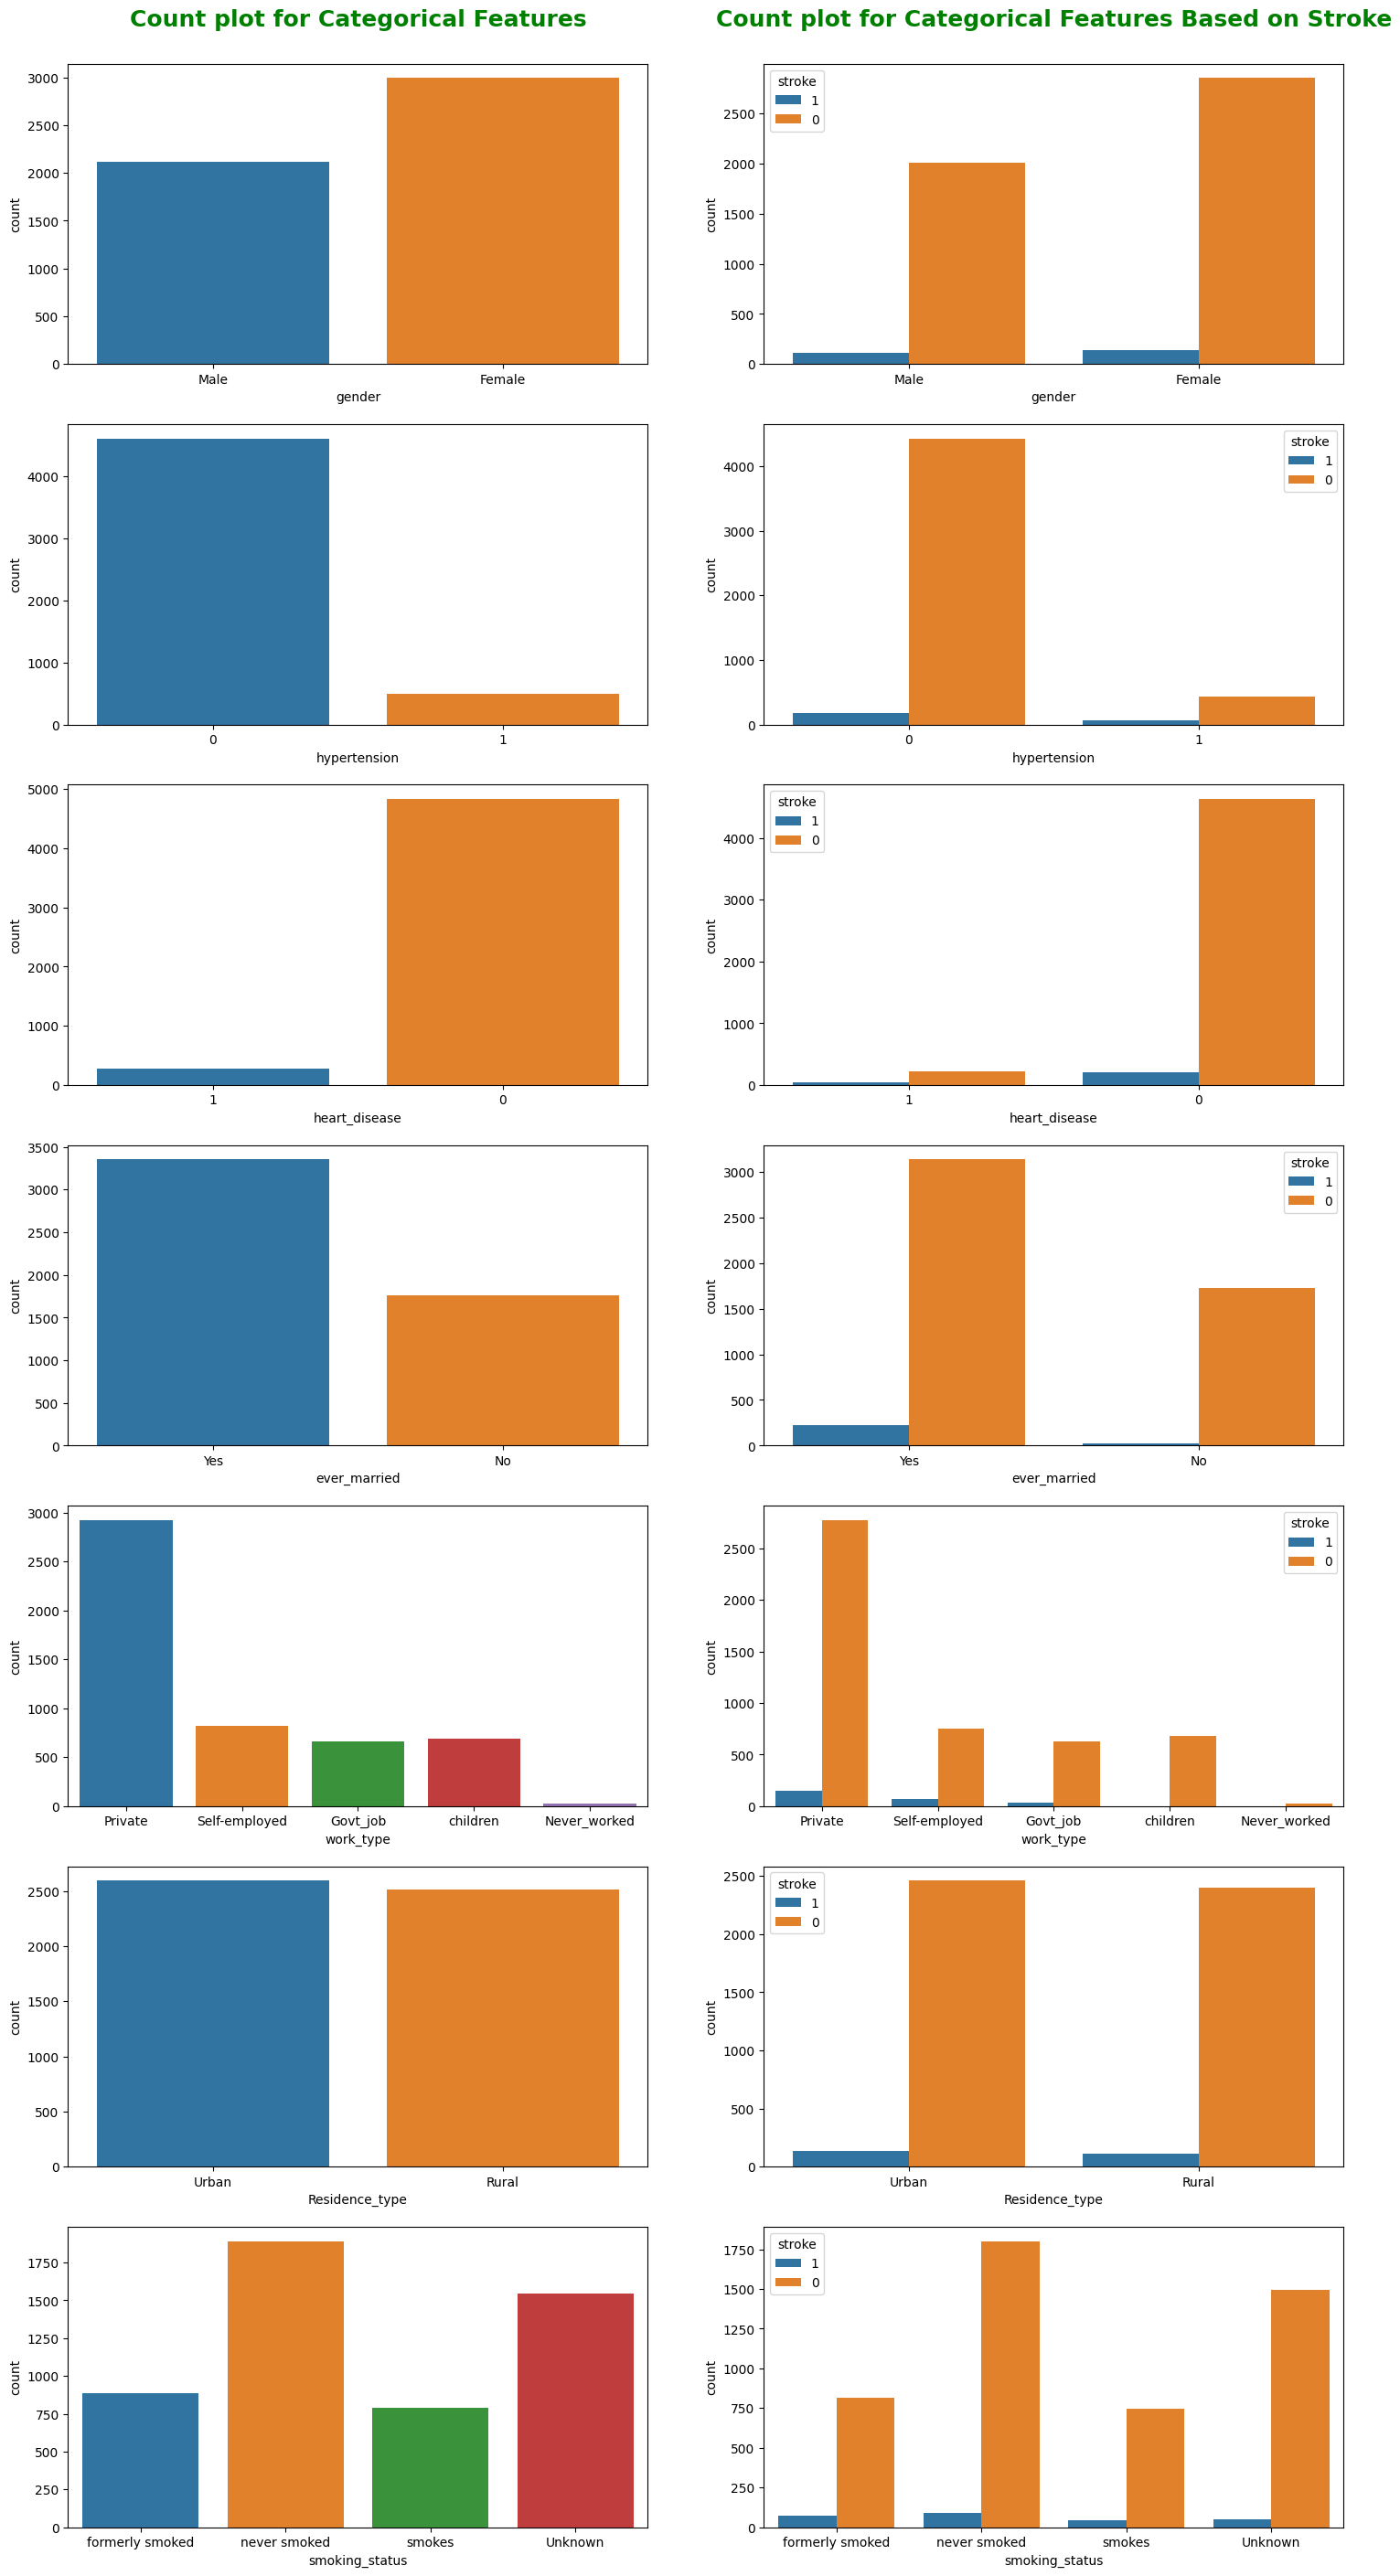

In [28]:
fig,ax = plt.subplots(7,2,figsize=(18,35))
for i, col in enumerate(cat_cols):
    sns.countplot(data = data, x = col, ax=ax[i,0])
    sns.countplot(data = data, x = col,hue='stroke', ax=ax[i,1])
    if i == 0:
        ax[0,0].set_title('Count plot for Categorical Features', loc='center', y=1.1, size=18, weight='bold',color='green')
    else:
        ax[0,1].set_title('Count plot for Categorical Features Based on Stroke', loc='center', y=1.1, size=18, weight='bold',color='green')

In [29]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
def knn_impute(df, na_target):
    df = df.copy()

    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[:, numeric_df.isna().sum() == 0].columns

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    df.loc[df[na_target].isna() == True, na_target] = y_pred

    return df

In [31]:
data1 = knn_impute(data, 'bmi')
data1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
data2 = pd.get_dummies(data1, drop_first= True)
data2.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,5.432367,3.600048,1,0,1,1,0,1,0,0,1,1,0,0,1
1,61.0,5.309307,3.535493,0,0,0,1,0,0,1,0,0,0,1,0,1
2,80.0,4.662684,3.481240,1,0,1,1,0,1,0,0,0,0,1,0,1
3,49.0,5.143008,3.538057,0,0,0,1,0,1,0,0,1,0,0,1,1
4,79.0,5.159745,3.178054,0,1,0,1,0,0,1,0,0,0,1,0,1


In [33]:
data2.shape

(5109, 16)

In [34]:
data2.describe()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,4.592392,3.330511,0.413975,0.097475,0.054022,0.656293,0.004306,0.572323,0.160305,0.134469,0.508123,0.173028,0.370327,0.154433,0.048738
std,22.613575,0.361983,0.262303,0.492592,0.296633,0.226084,0.474991,0.065486,0.494790,0.366925,0.341188,0.499983,0.378308,0.482939,0.361399,0.215340
min,0.080000,4.009513,2.332144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,4.346917,3.165475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,4.520483,3.339322,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,4.736988,3.499533,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,82.000000,5.604846,4.580877,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# # lưu tập dữ liệu để sử dụng cho chuẩn hóa dữ liệu đầu vào
# data2[['age','avg_glucose_level','bmi']].to_csv('standardScaler.csv', index=False)

In [35]:
s = StandardScaler()
data2[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(data2[['bmi', 'avg_glucose_level', 'age']])

In [36]:
s.mean_


array([ 3.33051125,  4.59239248, 43.2299863 ])

In [37]:
s.scale_

array([ 0.26227729,  0.36194747, 22.61136209])

In [38]:
data3 = data2.copy()
data3.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.051242,2.320709,1.027679,1,0,1,1,0,1,0,0,1,1,0,0,1
1,0.785889,1.980714,0.781547,0,0,0,1,0,0,1,0,0,0,1,0,1
2,1.626174,0.194204,0.574693,1,0,1,1,0,1,0,0,0,0,1,0,1
3,0.255182,1.521257,0.791320,0,0,0,1,0,1,0,0,1,0,0,1,1
4,1.581949,1.567499,-0.581283,0,1,0,1,0,0,1,0,0,0,1,0,1


In [39]:
oversample = RandomOverSampler(sampling_strategy='minority')
X = data3.drop(['stroke_1'], axis=1)
y = data3['stroke_1']
X_over, y_over = oversample.fit_resample(X, y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.1, random_state= 42)

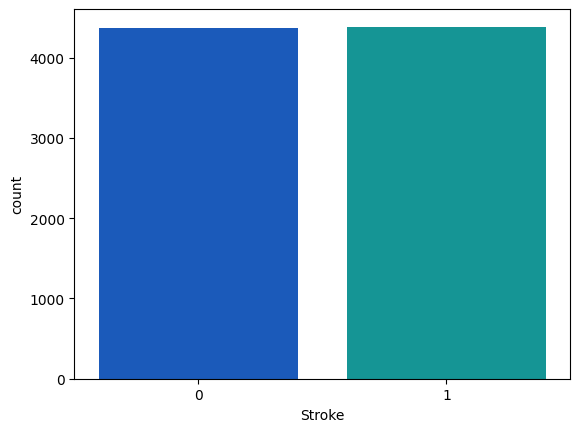

In [41]:
sns.countplot(x = y_train, palette= 'winter')
plt.xlabel('Stroke');

In [42]:
print(y_train.value_counts())
print(y_test.value_counts())

1    4385
0    4363
Name: stroke_1, dtype: int64
0    497
1    475
Name: stroke_1, dtype: int64


In [43]:
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 100, 1000]
}

svm = RandomizedSearchCV(SVC(probability= True), parameters, cv=5)
svm.fit(X_train, y_train)
svm.best_params_

{'gamma': 1000, 'C': 10}

Accuracy: 1.0
ROC AUC Score: 1.0


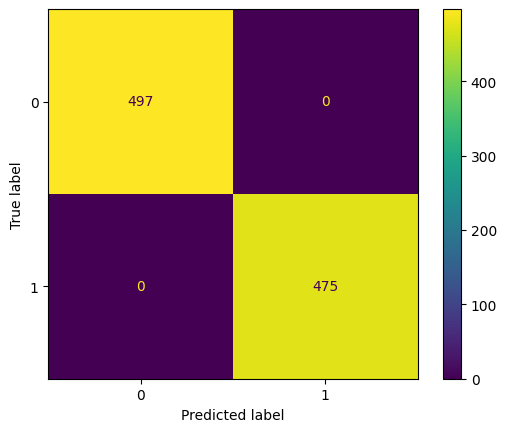

In [44]:
SVM = SVC(probability=True, C=10, gamma=1000)
SVM.fit(X_train, y_train)

y_pred_svm = SVM.predict(X_test)
y_pred_prob_svm = SVM.predict_proba(X_test)[:, 1]

print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_svm))

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Accuracy: 0.9948559670781894
ROC AUC Score: 1.0


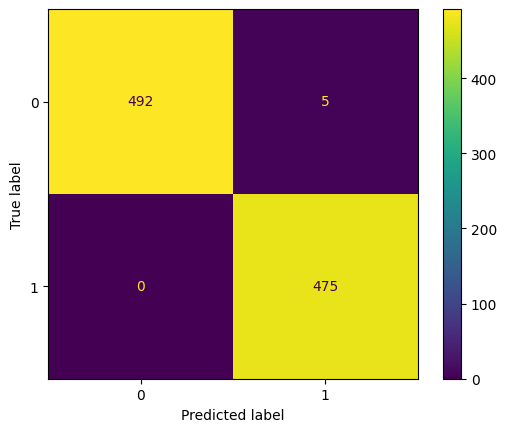

In [45]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [46]:
new_data = np.array([[0.876362,0.916200,0.479036, 1,0,0,1,0,1,0,0,0,1,0,0]])

s = SVM.predict(new_data)
if s == 0:
  print("Khong benh")
else:
  print("Co benh") 

Co benh


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# with gzip.open('.\\Model\\svm_stroke_model.pkl.gz', 'wb') as f:
#     pickle.dump(SVM, f)